# Problem 10: A Markov chain and its applications

A Markov chain (named after Andrey Markov), is a mathematical model of a system that hops from one _state_ (a situation or set of values) to another in a sequence of discrete time steps. You encountered this topic previously in one of your notebook assignments.

You may regard a Markov chain as having two components: a _state space_, which is the set of all possible states, and a probability of transitioning from any state to any other state. For example, a Markov chain model of a baby's behavior might have as its states, "playing," "eating", "sleeping," and "crying." In addition, there would be a probability that a baby in one time step "playing" will then be "sleeping" in the next.

Though not required for this exercise, feel free to explore http://setosa.io/ev/markov-chains/ for high level understanding, or review the relevant notebook from our course.

In this problem, you are going to explore a business case surrounding Markov chain application. Let's first develop a basic understanding of the concept through a simple example.

### Example Case: Retail Firm Selection in Country X

Assume Amazon and Walmart are the only two retail companies in country X. A local electronics manufacturer wants to partner with one of these companies. Currently, Amazon owns 45% and Walmart owns 55% of X's market. The manufacturer works with a market research company to find which of the brands will have a higher market share after 1 year.

Suppose the market research company draws the following conclusions.

`P(W->W) : Probability of a customer staying with the brand Walmart over a year = 0.7`

`P(W->A) : Probability of a customer switching from Walmart to Amazon over a year = 0.3`

`P(A->A) : Probability of a customer staying with the brand Amazon over a year = 0.9`

`P(A->W) : Probability of a customer switching from Amazon to Walmart over a year = 0.1`

We can clearly see customers tend to stick with Amazon but Amazon currently has a lower market share. Hence, we cannot be sure on the recommendation without doing some analysis.

### Transition diagrams

The statements made by the research company can be structured in form of a simple transition diagram:

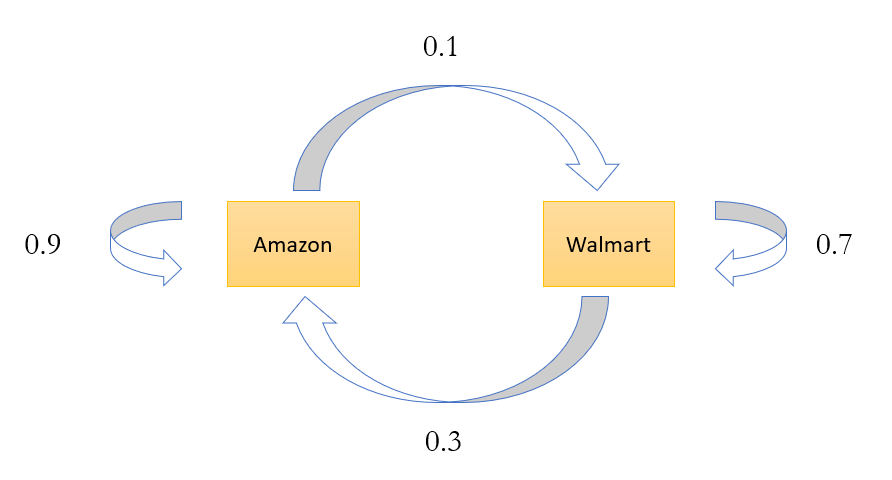

In [1]:
from IPython.display import Image
Image(filename ='Transition Diagram.PNG', height=600, width = 600)

The diagram simply shows the transitions reported by market research. Now, if we want to calculate the market share after a year, we need to do following calculations:

$$\mbox{(Walmart's Market share)}_{t+1} = \mbox{(Walmart's Market share)}_{t} \times P(W \rightarrow W) + \mbox{(Amazon's Market share)}_{t} \times P(A \rightarrow W)$$
$$\mbox{(Amazon's Market share)}_{t+1} = \mbox{(Amazon's Market share)}_{t} \times P(A \rightarrow A) + \mbox{(Walmart's Market share)}_{t} \times P(W \rightarrow A)$$

These calculations can be simply done by looking at the following matrix multiplication, also illustrated below:

$$(\mbox{Current State}) \times (\mbox{Transition Matrix}) = (\mbox{Final State})$$

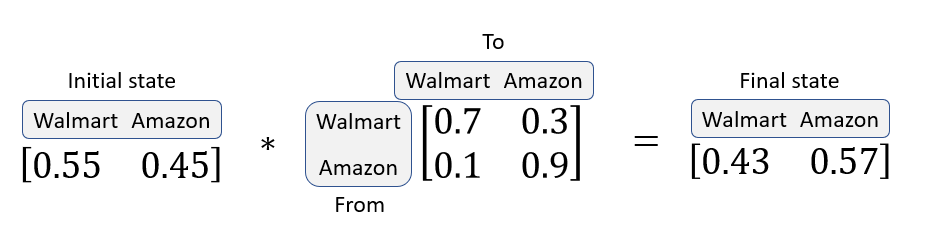

In [2]:
Image(filename ='Transition Equation.PNG', height=500, width =500)

One can clearly see that Walmart, although having high market share now, will have a lower market share after one year. This simple calculation is called Markov chain. If the transition matrix does not change with time, one can predict the market share at any future time point by following the above steps repetitively.

This notebook deals with predicting the future scenario using this approach.

### Case 1: Constant transition probability matrix

Lets import the libraries necessary for this exercise

In [3]:
import numpy as np

**Exercise 0** (1 point). Given a numpy 1-D array `St` containing initial market share and numpy 2-D array `T` containing transition probability matrix, complete the function `singletransition` below that produces numpy 1-D array containing the final market share. You can assume the same form of transition matrix as shown in figure above.

In [4]:
def singletransition(St, T):
    assert np.isclose(np.sum(St),1)
    ###
    return St.dot(T)
    
    ###


In [5]:
# Test cell: single_transition

# Test on example case
St = np.array([0.55,0.45])
T = np.array([[0.7,0.3],[0.1,0.9]])
sol = np.array([0.43, 0.57])
print('Test 1 of 5')
print('Your solution: {}'.format(singletransition(St, T)))
print('Instructor solution: {} \n'.format(sol))
for i,j in enumerate(singletransition(St, T)):
    assert np.isclose(j,sol[i]) , print(
        'Results do not match, your solution {} does not equal {}'.format(j, sol[i]))

# Test with array size 3
St3 = np.array([0.44664186, 0.15153931, 0.40181883])
T3 = np.array([[0.24680074, 0.52285439, 0.23034487],
 [0.32641347, 0.3699938, 0.30359273],
 [0.29322703, 0.13314519, 0.57362777]])
sol3 = np.array([0.27752016, 0.34309751, 0.37938233])
student3 = singletransition(St3, T3)
print('Test 2 of 5')
print('Your solution: {}'.format(student3))
print('Instructor solution: {} \n'.format(sol3))
for i,j in enumerate(sol3):
    assert np.isclose(student3[i], j), print(
        'Results do not match, your result {} does not equal {}'
        .format(student3[i], j))  

# Test with array size 4
St4 = np.array([0.46348246, 0.0063701, 0.3560158, 0.17413163])
T4 = np.array([[0.15292981, 0.36038216, 0.32511928, 0.16156876],
 [0.29056609, 0.28776914, 0.13142238, 0.29024239],
 [0.27808013, 0.37159361, 0.34318731, 0.00713895],
 [0.22226535, 0.22697133, 0.28684231, 0.26392101]])
sol4 = np.array([0.21043557, 0.34068002, 0.32365268, 0.12523173])
student4 = singletransition(St4, T4)
print('Test 3 of 5')
print('Your solution: {}'.format(student4))
print('Instructor solution: {} \n'.format(sol4))
for i,j in enumerate(sol4):
    assert np.isclose(student4[i], j), print(
        'Results do not match, your result {} does not equal {}'
        .format(student4[i], j))  

# Test with array size 5
St5 = np.array([0.27838571, 0.1261789, 0.10763439, 0.22326285, 0.26453816])
T5 = np.array([[0.23897351, 0.17605678, 0.22168126, 0.22863423, 0.13465422],
        [0.3404714, 0.21844389, 0.11001703, 0.08181935, 0.24924833],
        [0.14388754, 0.2676258, 0.22743847, 0.14483081, 0.21621738],
        [0.3146344, 0.10621542, 0.34081728, 0.06310043, 0.17523248],
        [0.10819616, 0.09855585, 0.33565443, 0.36779304, 0.08980052]])
sol5 = np.array([0.22384255, 0.15516618, 0.26496016, 0.20094443, 0.15508668])    
student5 = singletransition(St5, T5)
print('Test 4 of 5')
print('Your solution: {}'.format(student5))
print('Instructor solution: {} \n'.format(sol5))
for i,j in enumerate(sol5):
    assert np.isclose(student5[i], j), print(
        'Results do not match, your result {} does not equal {}'
        .format(student5[i], j))  

# Test with array size 6
St6 = np.array([0.00682375, 0.3320537, 0.14169109, 0.38354018, 0.04015516, 0.09573612])
T6 = np.array([[0.15414686, 0.15058302, 0.22339325, 0.11940891, 0.16688188, 0.18558608],
        [0.17565938, 0.26875781, 0.11568555, 0.100695, 0.27022663, 0.06897564],
        [0.13797953, 0.06117809, 0.05924408, 0.15742759, 0.36481409, 0.21935661],
        [0.15547467, 0.20770454, 0.20474472, 0.18479827, 0.20707914, 0.04019865],
        [0.18893035, 0.12266452, 0.17363061, 0.12374353, 0.19262527, 0.19840572],
        [0.2550682, 0.20622466, 0.20697328, 0.07478802, 0.25281404, 0.0041318]])
sol6 = np.array([0.17056723, 0.20326976, 0.15364737, 0.13956347, 0.25392092, 0.07903126])
student6 = singletransition(St6, T6)
print('Test 5 of 5')
print('Your solution: {}'.format(student6))
print('Instructor solution: {} \n'.format(sol6))
for i,j in enumerate(sol6):
    assert np.isclose(student6[i], j), print(
        'Results do not match, your result {} does not equal {}'
        .format(student6[i], j)) 

print("\n(Passed!)")

Test 1 of 5
Your solution: [0.43 0.57]
Instructor solution: [0.43 0.57] 

Test 2 of 5
Your solution: [0.27752016 0.34309751 0.37938233]
Instructor solution: [0.27752016 0.34309751 0.37938233] 

Test 3 of 5
Your solution: [0.21043557 0.34068001 0.32365268 0.12523173]
Instructor solution: [0.21043557 0.34068002 0.32365268 0.12523173] 

Test 4 of 5
Your solution: [0.22384255 0.15516618 0.26496017 0.20094443 0.15508668]
Instructor solution: [0.22384255 0.15516618 0.26496016 0.20094443 0.15508668] 

Test 5 of 5
Your solution: [0.17056723 0.20326976 0.15364736 0.13956347 0.25392092 0.07903126]
Instructor solution: [0.17056723 0.20326976 0.15364737 0.13956347 0.25392092 0.07903126] 


(Passed!)


As discussed before, we can use this technique to perform a forecast after multiple periods.

**Exercise 1** (2 points). Given a numpy 1-D array `St` containing initial weights and numpy 2-D array `T` containing transition probability matrix, complete the function `ktransition` that takes `k` as 3rd argument where k defines the number of periods after which forecast has to be done and produces numpy 1-D array containing the final state.

In [6]:
def ktransition(St, T, k):
    assert np.isclose(np.sum(St),1)
    assert k>=0
    ###
    
#     T0 = T
#     for i in range(k-1):
#         T0 = T0 @ T
    S = St
    for i in range(k):
        S = S.dot(T)
#     return St.dot(T0)
    return S
    ###


In [7]:
# Test cell: k_transition1
St = np.array([0.55,0.45])
T1 = np.array([[0.7,0.3],[0.1,0.9]])
T2 = np.array([[0.8,0.2],[0.2,0.8]])
y1 = ktransition(St, T1, 3)
y2 = ktransition(St, T2, 3)
test1 = np.array([ 0.3148,  0.6852])
test2 = np.array([ 0.5108,  0.4892])

print('Test case 1 of 2')
print('Your solution: {}'.format(y1))
print('Instructor solution: {} \n'.format(test1))
for i,j in enumerate(y1):
    assert np.isclose(j,test1[i]) , print('Results do not match, {} does not equal {}'.format(j, test1[i]))

print('Test case 2 of 2')
print('Your solution: {}'.format(y2))
print('Instructor solution: {} \n'.format(test2))    
for i,j in enumerate(y2):
    assert np.isclose(j,test2[i]) , print('Results do not match, {} does not equal {}'.format(j, test2[i]))

print('\n(Passed Test Cell 1 of 2)')

Test case 1 of 2
Your solution: [0.3148 0.6852]
Instructor solution: [0.3148 0.6852] 

Test case 2 of 2
Your solution: [0.5108 0.4892]
Instructor solution: [0.5108 0.4892] 


(Passed Test Cell 1 of 2)


In [8]:
# Test cell: k_transition2
print('Testing for random values of St, T, and k...')

for k in range(1,26):
    for j in range(2,51):
        St = np.random.rand(j)
        St_total = np.sum(St)
        for i in range(len(St)):
            St[i] = St[i]/St_total 
        T = np.random.rand(j,j)
        for i in range(len(T)):
            row_total = np.sum(T[i])
            for j in range(len(T)):
                T[i][j] = T[i][j]/row_total
        test = St
        for x in range(k):
            test = test.dot(T)
        for i,j in enumerate(test):
            assert np.isclose(j,test[i]) , print('Results do not match for k={}, size(T)={}, {} does not equal {}'.format(k, len(T), j, test[i]))
    print('k={} passed'.format(k))
    
print('\n(Passed Test Cell 2 of 2)')

Testing for random values of St, T, and k...
k=1 passed
k=2 passed
k=3 passed
k=4 passed
k=5 passed
k=6 passed
k=7 passed
k=8 passed
k=9 passed
k=10 passed
k=11 passed
k=12 passed
k=13 passed
k=14 passed
k=15 passed
k=16 passed
k=17 passed
k=18 passed
k=19 passed
k=20 passed
k=21 passed
k=22 passed
k=23 passed
k=24 passed
k=25 passed

(Passed Test Cell 2 of 2)


### Case 2: Variable Transition probability matrix

One assumption we have made is that the transition probability matrix remains constant over time. However, it's quite possible that the matrix changes over time and hence, the forecast has to be done accomodating time-varying transition probabilities.

**Exercise 2** (3 points). Given a numpy 1-D array `St` containing initial weights, a list of tuples `flexT`, and forecast period `k`, complete the function `flexktransition()` so that it produces a numpy 1-D array containing the final state. Each element of the list `flexT` will contain transition probability matrix as the second element and the number of periods for which the transition probability matrix is valid as the first element.

For example, `flexktransition(St, [(3, T1), (3, T2)], 6)` means that given a numpy 1-D array `St` containing initial weights, the transition probability matrix will be `T1` for the first 3 periods and `T2` for the next 3 periods. (That is, the total number of periods is `k=6`.) Note that the sum of the periods will always be greater than or equal to `k`. 

In [9]:
def flexktransition(St, flexT, k):
    assert np.isclose(np.sum(St),1)
    assert k>=0
    assert np.sum([x[0] for x in flexT])>=k
    ###
    
    # flexT = [(3,T1),(3,T2)]
    S = St
    for i in range(len(flexT)):
        t, T = flexT[i]
        S = ktransition(S, T, min(k,t))
        k -= t
        if k <= 0:
            break
      
    
    return S
    ###


In [10]:
# Test cell: flex_transition1
St = np.array([0.55,0.45])
T1 = np.array([[0.7,0.3],[0.1,0.9]])
T2 = np.array([[0.8,0.2],[0.2,0.8]])

print('Your Result: {}'.format(flexktransition(St,[(3,T1),(3,T2)],6)))
print('Instructor Result: {}'.format(np.array([0.4599968, 0.5400032])))

for i,j in enumerate(flexktransition(St,[(3,T1),(3,T2)],6)):
    if i==0:
        assert np.isclose(j,0.4599968)
    if i==1:
        assert np.isclose(j,0.5400032)

print('\n(Passed Test Cell 1 of 2)')

Your Result: [0.4599968 0.5400032]
Instructor Result: [0.4599968 0.5400032]

(Passed Test Cell 1 of 2)


In [11]:
# Test cell: flex_transition2
import random

# Generate random list of integers whose sum is equal to or greater than k
def generateflexnums(flexnum, k):
    assert flexnum >= 2, print('not enough flexing!')
    assert flexnum < k, print('too much flexing!')
    result = []
    init = random.randint(1,k+1-flexnum)
    result.append(init)
    for i in range(1,flexnum):
        new_ceil = k-(flexnum-i)-(sum(result)-1)
        if i == flexnum - 1:
            result.append(new_ceil+random.randint(0,4))
        else:
            init = random.randint(1,new_ceil)
            result.append(init)
    return result

print('Testing for random St, flexT\'s, and k...')
for k in range(3,11):
    for flexnum in range(2,k):
        periods = generateflexnums(flexnum,k)
        for j in range(2,51):
            St = np.random.rand(j)
            St_total = np.sum(St)
            for i in range(len(St)):
                St[i] = St[i]/St_total 
            flexT = []
            for x in range(flexnum):
                T = np.random.rand(j,j)
                for i in range(len(T)):
                    row_total = np.sum(T[i])
                    for y in range(len(T)):
                        T[i][y] = T[i][y]/row_total
                flexT.append((periods[x],T))
            test = flexktransition(St, flexT, k)
            St_res = St
            count = 0
            val = k
            while val > 0 and count < len(flexT):
                flex_num = flexT[count]
                St_res = ktransition(St_res, flex_num[1], min(val, flex_num[0]))
                val -= flex_num[0]
                count += 1
            for i,j in enumerate(test):
                assert np.isclose(j,St_res[i]) , print('Results do not match for k={}, flexT={} size(T)={}, {} does not equal {}'.format(k, flexT, len(T), j, St_res[i]))
    print('Passed for k={}'.format(k))

print('\n(Passed Test Case 2 of 2)')

Testing for random St, flexT's, and k...
Passed for k=3
Passed for k=4
Passed for k=5
Passed for k=6
Passed for k=7
Passed for k=8
Passed for k=9
Passed for k=10

(Passed Test Case 2 of 2)


### Steady state using constant transition probability

The manufacturing company wants to determine the size of the gap in market share between Walmart and Amazon in the long run. This knowledge will help them frame the right costing strategy before pitching to the companies. For this exercise, you can assume that the transition probability matrix remains constant for the whole duration and its entries are such that the steady state will always be achieved. Let’s formulate an algorithm to find the steady state. 

> **Hint.** After reaching steady state, multiplication of the current state with the transition matrix will give current state again. Hence, the matrix that can satisfy following condition will be the final proportions, i.e.,

$$(\mbox{Initial state}) \times (\mbox{Transition Matrix}) = (\mbox{Initial state}).$$

**Exercise 3** (4 points). Given a numpy 1-D array `St` containing initial weights and numpy 2-D array `T` containing transition probability matrix, complete the function `steadystate` that produces numpy 1-D array containing the long term steady state values.

In [12]:
def steadystate(St, T):
    ###
    T0 = T
    for i in range(100):
        T1 = T0.dot(T)
        if np.isclose(T1,T0).all():
            T0 = T1
            break
        else:
            T0 = T1
    return St @ T0    
    
    ###


In [13]:
# Test cell: steady_state1
St = np.array([0.55,0.45])
T = np.array([[0.7,0.3],[0.1,0.9]])
sol = np.array([ 0.25,  0.75])
print('Your solution: {}'.format(steadystate(St, T)))
print('Instructor solution: {} \n'.format(sol))
for i,j in enumerate(steadystate(St, T)):
    assert np.isclose(j,sol[i]) , print(
        'Results do not match, {} does not equal {}'.format(j, sol[i]))
    
print('\n(Passed Test Cell 1 of 2)')

Your solution: [0.25000142 0.74999858]
Instructor solution: [0.25 0.75] 


(Passed Test Cell 1 of 2)


In [14]:
# Test cell: steady_state2

# Test with array size 3
St3 = np.array([0.44664186, 0.15153931, 0.40181883])
T3 = np.array([[0.24680074, 0.52285439, 0.23034487],
 [0.32641347, 0.3699938, 0.30359273],
 [0.29322703, 0.13314519, 0.57362777]])
sol3 = np.array([ 0.29045455,  0.32279047,  0.38675492])
student3 = steadystate(St3, T3)
print('Test 1 of 4')
print('Your solution: {}'.format(student3))
print('Instructor solution: {} \n'.format(sol3))
for i,j in enumerate(sol3):
    assert np.isclose(student3[i], j), print(
        'Results do not match, your result {} does not equal {}'
        .format(student3[i], j))  

# Test with array size 4
St4 = np.array([0.46348246, 0.0063701, 0.3560158, 0.17413163])
T4 = np.array([[0.15292981, 0.36038216, 0.32511928, 0.16156876],
 [0.29056609, 0.28776914, 0.13142238, 0.29024239],
 [0.27808013, 0.37159361, 0.34318731, 0.00713895],
 [0.22226535, 0.22697133, 0.28684231, 0.26392101]])
sol4 = np.array([ 0.24171466,  0.31629347,  0.2616805 ,  0.1803114 ])
student4 = steadystate(St4, T4)
print('Test 2 of 4')
print('Your solution: {}'.format(student4))
print('Instructor solution: {} \n'.format(sol4))
for i,j in enumerate(sol4):
    assert np.isclose(student4[i], j), print(
        'Results do not match, your result {} does not equal {}'
        .format(student4[i], j))  

# Test with array size 5
St5 = np.array([0.27838571, 0.1261789, 0.10763439, 0.22326285, 0.26453816])
T5 = np.array([[0.23897351, 0.17605678, 0.22168126, 0.22863423, 0.13465422],
        [0.3404714, 0.21844389, 0.11001703, 0.08181935, 0.24924833],
        [0.14388754, 0.2676258, 0.22743847, 0.14483081, 0.21621738],
        [0.3146344, 0.10621542, 0.34081728, 0.06310043, 0.17523248],
        [0.10819616, 0.09855585, 0.33565443, 0.36779304, 0.08980052]])
sol5 = np.array([ 0.22461444,  0.18015592,  0.243921  ,  0.17677034,  0.17453834])    
student5 = steadystate(St5, T5)
print('Test 3 of 4')
print('Your solution: {}'.format(student5))
print('Instructor solution: {} \n'.format(sol5))
for i,j in enumerate(sol5):
    assert np.isclose(student5[i], j), print(
        'Results do not match, your result {} does not equal {}'
        .format(student5[i], j))  

# Test with array size 6
St6 = np.array([0.00682375, 0.3320537, 0.14169109, 0.38354018, 0.04015516, 0.09573612])
T6 = np.array([[0.15414686, 0.15058302, 0.22339325, 0.11940891, 0.16688188, 0.18558608],
        [0.17565938, 0.26875781, 0.11568555, 0.100695, 0.27022663, 0.06897564],
        [0.13797953, 0.06117809, 0.05924408, 0.15742759, 0.36481409, 0.21935661],
        [0.15547467, 0.20770454, 0.20474472, 0.18479827, 0.20707914, 0.04019865],
        [0.18893035, 0.12266452, 0.17363061, 0.12374353, 0.19262527, 0.19840572],
        [0.2550682, 0.20622466, 0.20697328, 0.07478802, 0.25281404, 0.0041318]])
sol6 = np.array([0.17688749, 0.1632426, 0.16270463, 0.12588329, 0.23856304, 0.13271893])
student6 = steadystate(St6, T6)
print('Test 4 of 4')
print('Your solution: {}'.format(student6))
print('Instructor solution: {} \n'.format(sol6))
for i,j in enumerate(sol6):
    assert np.isclose(student6[i], j), print(
        'Results do not match, your result {} does not equal {}'
        .format(student6[i], j)) 

print("\n(Passed Test Cell 2 of 2)")

Test 1 of 4
Your solution: [0.29045456 0.32279049 0.38675491]
Instructor solution: [0.29045455 0.32279047 0.38675492] 

Test 2 of 4
Your solution: [0.24171466 0.31629349 0.26168048 0.18031139]
Instructor solution: [0.24171466 0.31629347 0.2616805  0.1803114 ] 

Test 3 of 4
Your solution: [0.22461445 0.18015591 0.24392101 0.17677032 0.17453835]
Instructor solution: [0.22461444 0.18015592 0.243921   0.17677034 0.17453834] 

Test 4 of 4
Your solution: [0.17688752 0.16324262 0.16270464 0.12588328 0.23856303 0.13271889]
Instructor solution: [0.17688749 0.1632426  0.16270463 0.12588329 0.23856304 0.13271893] 


(Passed Test Cell 2 of 2)


**Fin!** You've reached the end of this problem. Don't forget to restart the kernel and run the entire notebook from top-to-bottom to make sure you did everything correctly. If that is working, try submitting this problem. (Recall that you *must* submit and pass the autograder to get credit for your work!)